In [ ]:
!pip install scikit-learn
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.7 MB/s eta 0:00:00


In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np

import sklearn
import sklearn.datasets as datasets
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('NumPy: {}'.format(np.__version__))

np.random.seed(42)


Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Scikit-learn: 1.2.2
NumPy: 1.25.2


# Short simulation

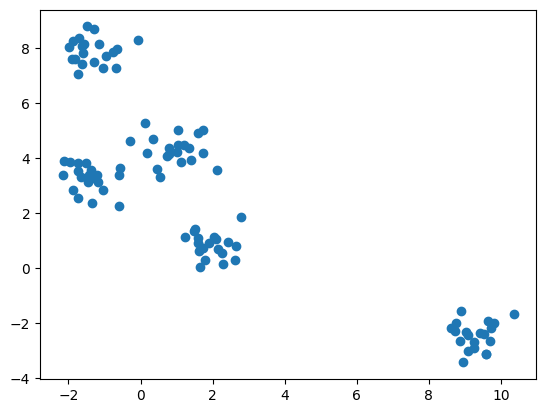

In [ ]:
# Generate random data
X, Y = datasets.make_blobs(centers=5, cluster_std=0.5, random_state=0)

# Observe the data that you will manipulate
plt.jet()
plt.scatter(X[:,0], X[:,1])
plt.show()

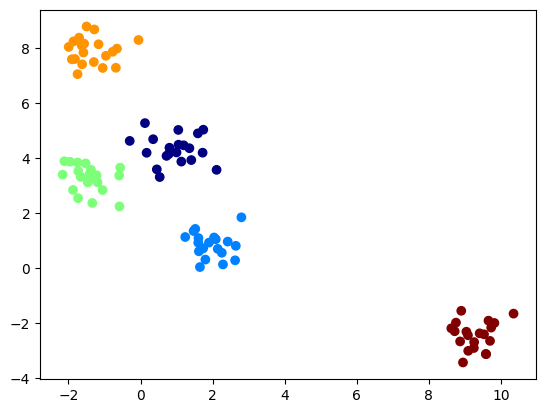

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

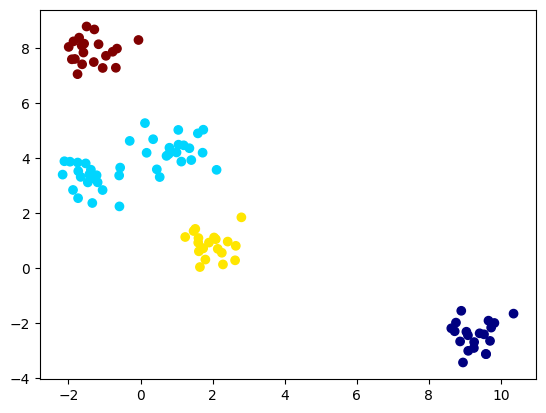

In [ ]:
##**** Apply K-means clustering with k=4 then k=5 ***##
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
Y_hat = kmeans.fit(X).labels_
plt.scatter(X[:,0], X[:,1], c=Y_hat)
plt.show()

[[ 9.29876892 -2.45311503]
 [-0.24142303  3.79599144]
 [ 1.95870099  0.8332413 ]
 [-1.34316029  7.9094545 ]]


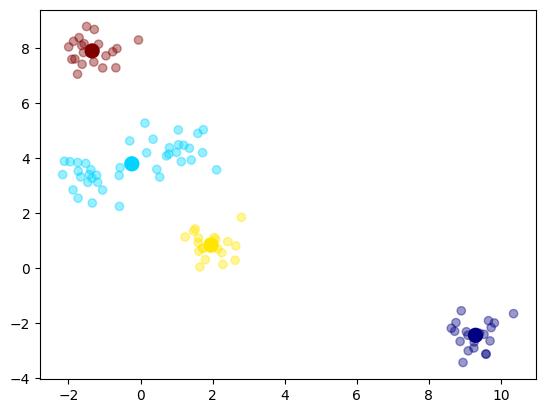

In [ ]:
##**** On the figure above, plot the centroids of the resulting clusters ***##
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
print(mu)

# K-means Clustering on MNIST digit data

## 1. Visualise MNIST digit data

In [ ]:
# Load 28*28 MNIST Images
from sklearn.datasets import fetch_openml
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)

##**** Take only 10000 instances to shorten runtime of KMeans ***##
X_digits = X_digits[0:10000]
Y_digits = Y_digits[0:10000]
n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))


##**** Print the number of classes, number of features, number of samples ***##
print(n_digits)
print("n_features: %d" % n_features)
print("n_samples: %d" % n_samples)


10
n_features: 784
n_samples: 10000


In [ ]:
##**** Visualize the values of Y-digits
print(Y_digits)
##**** Thus, explain to what refer X_digits and Y_digits ***##

##**** Print the number of samples per class ***##
X_digits = np.array(X_digits)
Y_digits = np.array(Y_digits)
Y_int = Y_digits.astype(int)
print("n_samples per group: %s" % np.bincount(Y_int))

0       5
1       0
2       4
3       1
4       9
       ..
9995    5
9996    8
9997    6
9998    9
9999    7
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
n_samples per group: [1001 1127  991 1032  980  863 1014 1070  944  978]


Class: 3


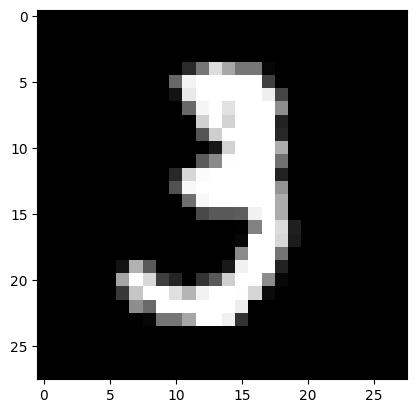

In [ ]:
##**** Show an exemple of MNIST data ***##
p = 10
plt.imshow(X_digits[p].reshape((28,28)), cmap='gray')
print("Class: %s" % Y_digits[p])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']


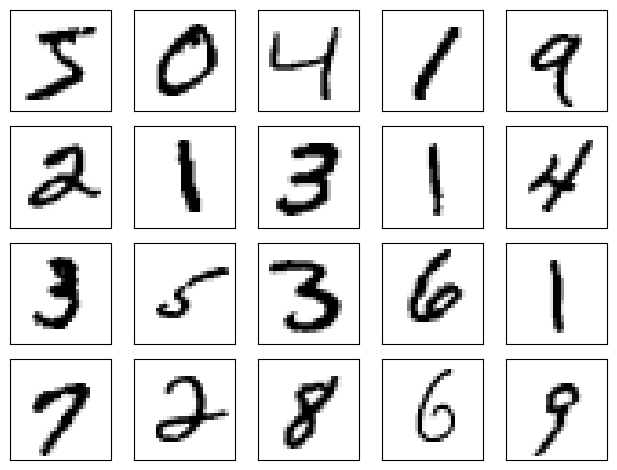

In [ ]:
##**** Display twenty images, simultaneously, in grey-scale level and their associated label ***##

plt.rc("image", cmap="binary")
print(Y_digits[:20])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

## 2. Apply K-Means

******** KMEANS completed ********


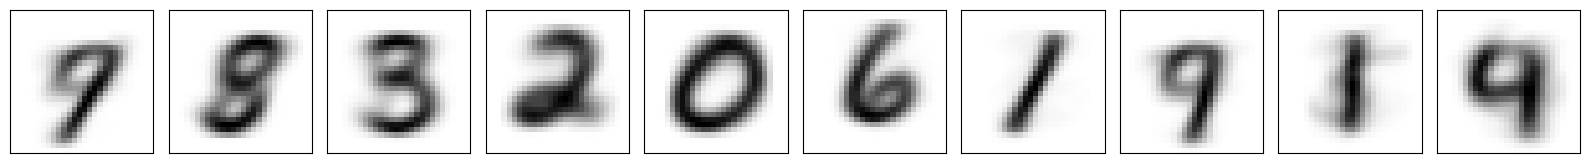

In [ ]:
##**** Apply K-means with K=10 ***##
from sklearn.cluster import KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
model = kmeans.fit(X_digits)

print("******** KMEANS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters = model.predict(X_digits)

##**** Visualize the centroids ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters):
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

##**** Analyze finely the obtained centroids ***##

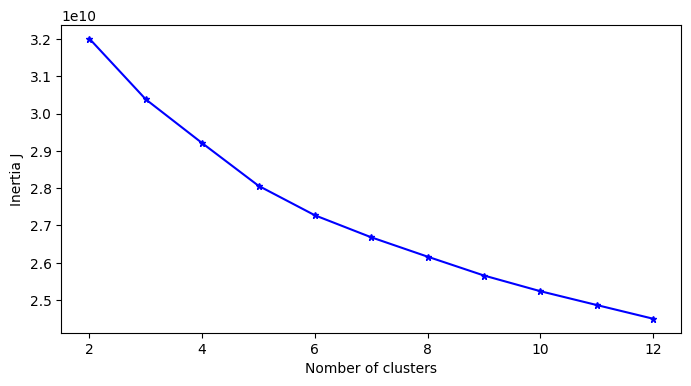

In [ ]:
##**** Plot the Cost Function(Inertia) of the model as a function of K (range : 2 to 13) ***##
def plot_inertia(X_digits):
    inertia = []
    K_range = range(2, 13)
    for k in K_range:
        model = KMeans(n_clusters=k).fit(X_digits)
        inertia.append(model.inertia_)

    plt.figure(figsize=((8,4)))
    plt.plot(K_range, inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Nomber of clusters')
    plt.ylabel('Inertia J')
    plt.show()

plot_inertia(X_digits)

##**** What do you observe ? ***##

## 3. Find the best number K of clusters

For k = 2 , Average Silhouette Score : 0.0908
For k = 3 , Average Silhouette Score : 0.0585
For k = 4 , Average Silhouette Score : 0.0632
For k = 5 , Average Silhouette Score : 0.0721
For k = 6 , Average Silhouette Score : 0.0694
For k = 7 , Average Silhouette Score : 0.0749
For k = 8 , Average Silhouette Score : 0.078
For k = 9 , Average Silhouette Score : 0.0622
For k = 10 , Average Silhouette Score : 0.0621
For k = 11 , Average Silhouette Score : 0.0629
For k = 12 , Average Silhouette Score : 0.0632


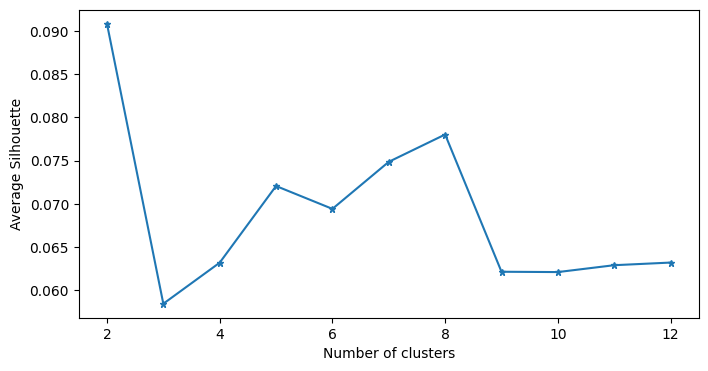

In [ ]:
##**** Study K (range : 2 to 13) using the clustering metric: Silhouette ***##

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X_digits):
    silhouette = []
    K_range = range(2,13)
    for k in K_range:
        clusterer = KMeans(n_clusters=k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg, 4))
        silhouette.append(silhouette_avg)

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    plt.show()

plot_silhouette(X_digits)

##**** Analyze the obtained curve and what do you conclude on the best value of K ***##

## 4. Evaluate the quality of the clustering based on the original labels using different tools

In [ ]:
##**** Tool 1 : Use confusion matrix reporting the distribution of the images of a given class (lines) in each cluster (column) ***##
conf_matrix = sklearn.metrics.confusion_matrix(Y_int, clusters)
print(conf_matrix)

##**** Analyze the results and accordingly conclude on the quality of the clustering  ***##
##**** Perfom a clustering with the best value of K. Analyze the quality of the clustering ***##

[[  1 106  41   6 782  38   0   2   4  21]
 [  1   2   1   2   0   1 570   1 548   1]
 [  7  27  60 660   7  23  55   4 126  22]
 [  9 234 610  29   5   9   6  22  95  13]
 [263   1   0   4   0  14  24 254  43 377]
 [ 19 253 239   2   9  21   5  53 234  28]
 [  0  13   4   9  14 757   4   0 117  96]
 [437   1   1   4   1   0  37 433  49 107]
 [ 28 502 210   8   4  17  29  24  88  34]
 [290   2  17   0   5   3   5 386  28 242]]


In [ ]:
sklearn.metrics.plot_confusion_matrix(kmeans, X_digits, Y_int)

NameError: name 'sklearn' is not defined

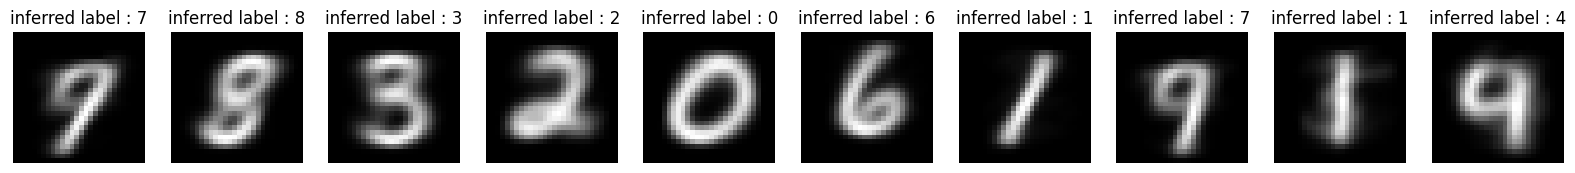

In [ ]:
##**** Tool 2 : Infer a label to each resulting cluster based on the most represented label in the cluster ***##

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

cluster_labels = infer_cluster_labels(model, Y_int)
ig, axs = plt.subplots(1,n_clusters,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
plt.show()

##**** Analyze the inferred labels with the best value of K. Conclude ***##

In [ ]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3))

Entropies= [6.96129605 7.03966035 7.07580886 6.58479139 6.7178047  6.7833252
 6.5998705  7.0724219  7.19443685 6.84694314]
Average Entropy = 6.888


Cluster  3  presents the lowest entropy value = 6.584791392385716


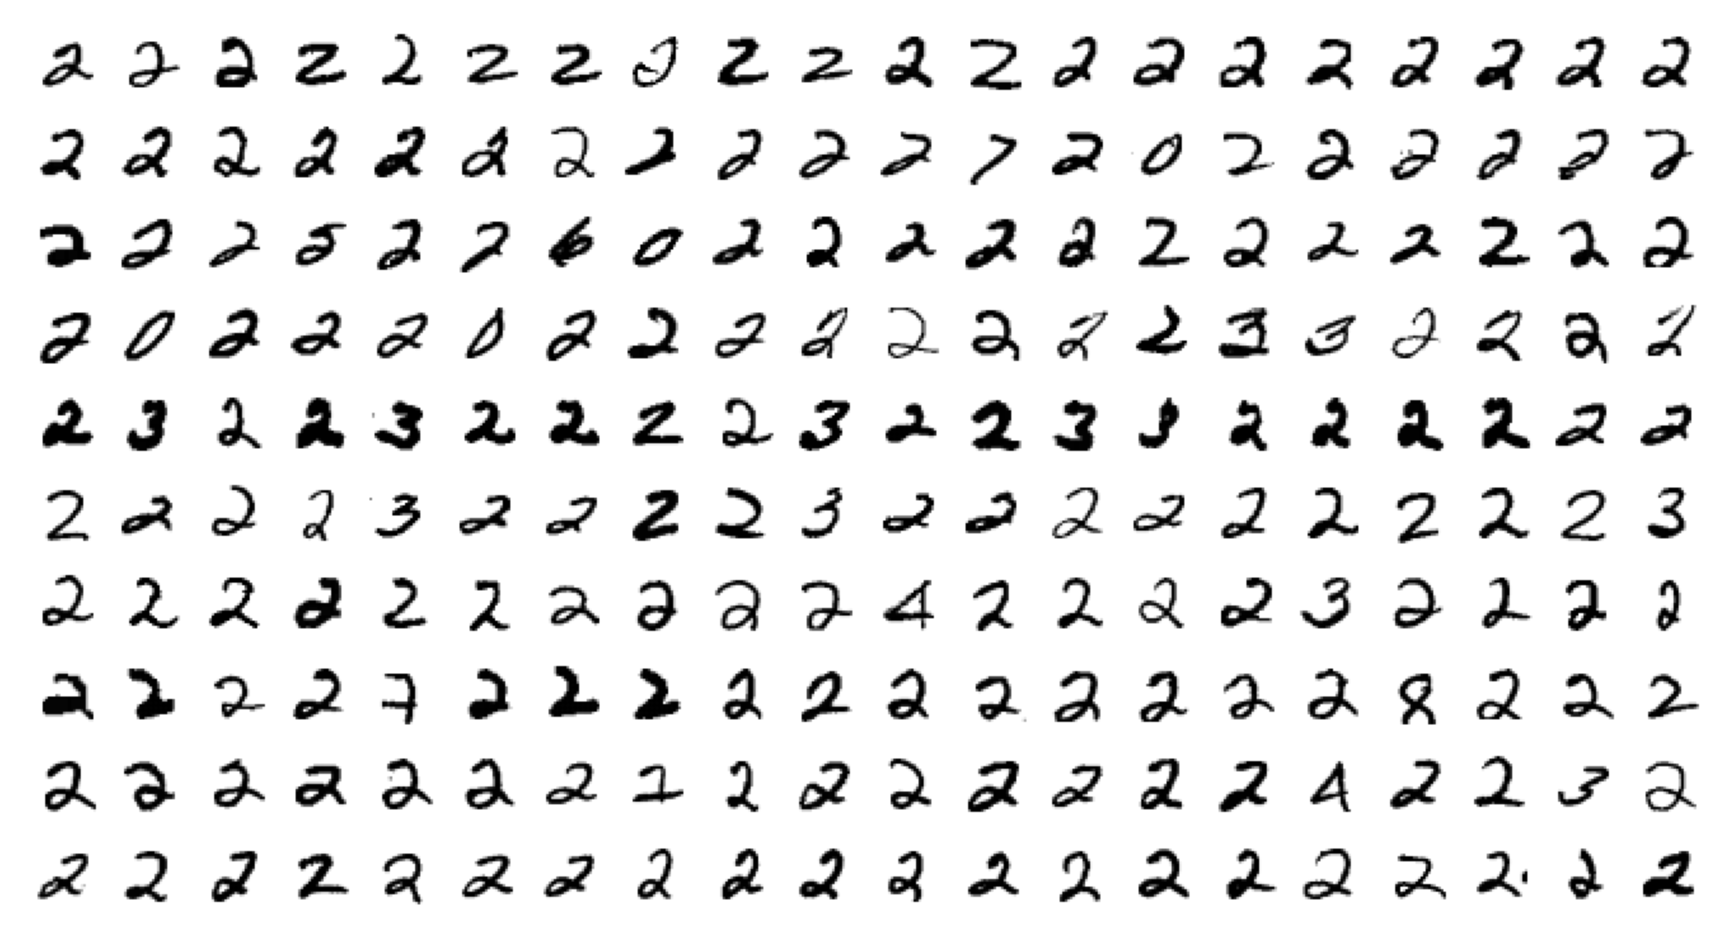

In [ ]:
indmin = np.argmin(entropie)

print("Cluster ", indmin, " presents the lowest entropy value =", entropie[indmin])
imc = X_digits[clusters == indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
    plt.axis('off')

Cluster  8  presents the highest entropy value = 7.194436851100336


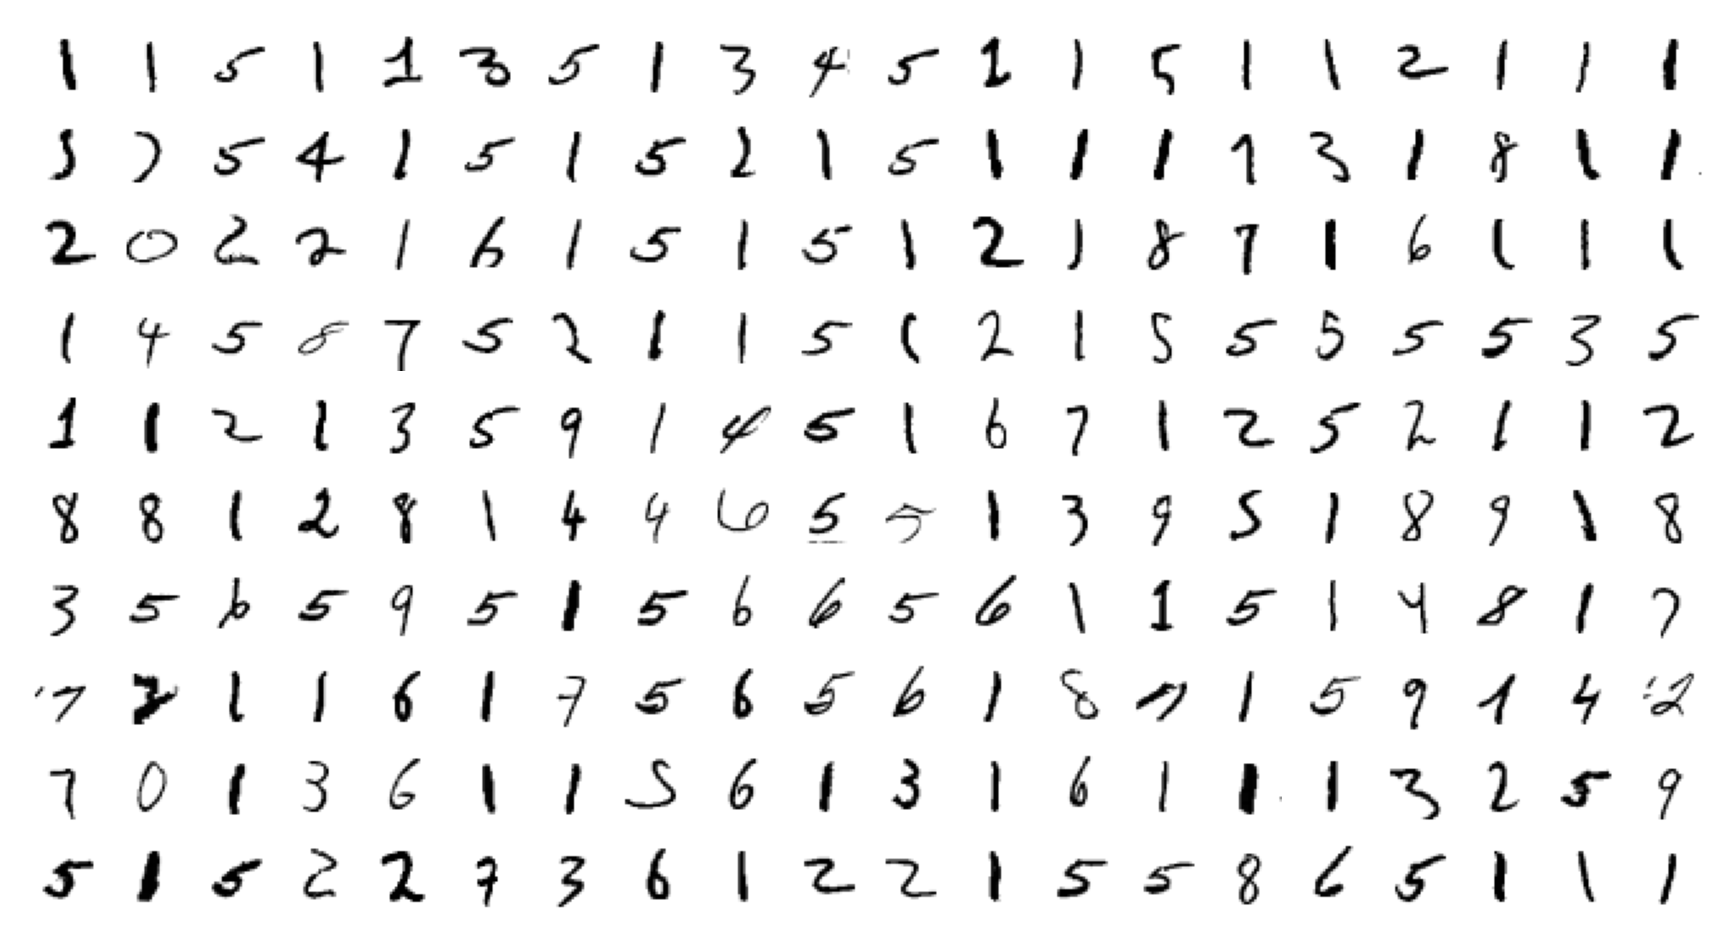

In [ ]:
indmax = np.argmax(entropie)

print("Cluster ", indmax, " presents the highest entropy value =", entropie[indmax])
imc = X_digits[clusters == indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
    plt.axis('off')

In [ ]:
# Test different number of clusters
clu = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n_clust in clu:
    estimator = KMeans(n_clusters=n_clust, init="k-means++",n_init=4)
    estimator.fit(X_digits)

    # Determine the inferred label of each cluster
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)

    # Compute and display the percentage of total good classification
    acc = metrics.accuracy_score(Y_int, predicted_Y)
    acc = acc * 100
    print("For k =", n_clust, ", Good distribution of : {}%\n".format(round(acc, 2)))

For k = 2 , Good distribution of : 20.93%

For k = 3 , Good distribution of : 30.04%

For k = 4 , Good distribution of : 37.96%

For k = 5 , Good distribution of : 45.55%

For k = 6 , Good distribution of : 47.51%

For k = 7 , Good distribution of : 52.55%

For k = 8 , Good distribution of : 56.74%

For k = 9 , Good distribution of : 56.23%

For k = 10 , Good distribution of : 56.82%

For k = 11 , Good distribution of : 59.89%

For k = 12 , Good distribution of : 61.64%

For k = 13 , Good distribution of : 64.47%

For k = 14 , Good distribution of : 65.9%

For k = 15 , Good distribution of : 68.46%



# K-Medoïd Clustering on MNIST Digit

## 1. Visualise MNIST digit data

## 2. Apply K-Medoïd

******** KMEDOIDS completed ********


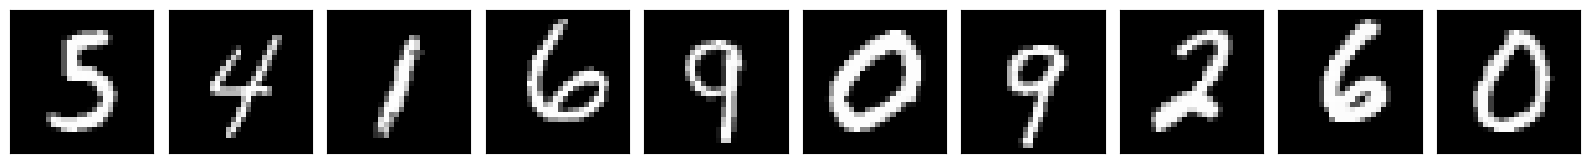

In [ ]:
from sklearn_extra.cluster import KMedoids
n_clusters = 10
kmedoids = KMedoids(n_clusters=n_clusters, init="k-medoids++")
model = kmedoids.fit(X_digits)

print("******** KMEDOIDS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters = model.predict(X_digits)

##**** Visualize the centroids ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters):
    plt.subplot(2, n_clusters, i+1)
    plt.imshow(centroid_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

##**** Analyze finely the obtained centroids ***##

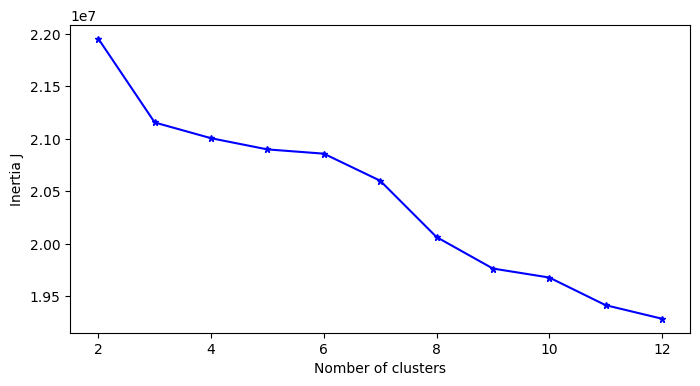

In [ ]:
##**** Plot the Cost Function(Inertia) of the model as a function of K (range : 2 to 13) ***##
def plot_inertia(X_digits):
    inertia = []
    K_range = range(2,13)
    for k in K_range:
        model = KMedoids(n_clusters=k).fit(X_digits)
        inertia.append(model.inertia_)

    plt.figure(figsize=((8,4)))
    plt.plot(K_range, inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Nomber of clusters')
    plt.ylabel('Inertia J')
    plt.show()

plot_inertia(X_digits)

##**** What do you observe ? ***##

## 3. Find the best number K of clusters

For k = 2 , Average Silhouette Score : 0.026
For k = 3 , Average Silhouette Score : 0.0318
For k = 4 , Average Silhouette Score : 0.0284
For k = 5 , Average Silhouette Score : 0.0275
For k = 6 , Average Silhouette Score : 0.0192
For k = 7 , Average Silhouette Score : 0.0276
For k = 8 , Average Silhouette Score : 0.0323
For k = 9 , Average Silhouette Score : 0.0256
For k = 10 , Average Silhouette Score : 0.0261
For k = 11 , Average Silhouette Score : 0.0331
For k = 12 , Average Silhouette Score : 0.0298


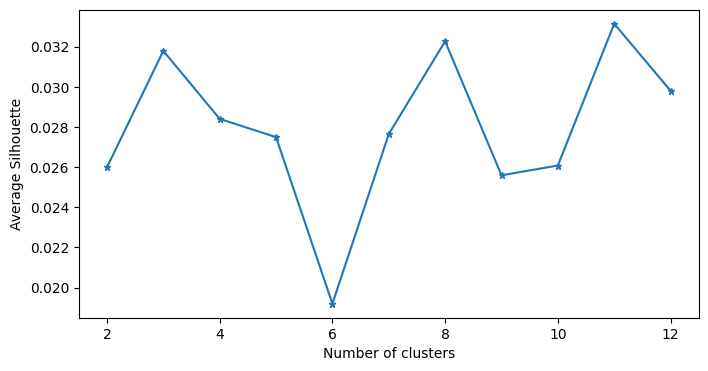

In [ ]:
##**** Study K (range : 2 to 13) using the clustering metric: Silhouette ***##

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X_digits):
    silhouette = []
    K_range = range(2, 13)
    for k in K_range:
        clusterer = KMedoids(n_clusters=k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
        silhouette.append(silhouette_avg)

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    plt.show()

plot_silhouette(X_digits)

##**** Analyze the obtained curve and what do you conclude on the best value of K ***##

## 4. Evaluate the quality of the clustering based on the original labels using different tools

In [ ]:
##**** Tool 1 : Use confusion matrix reporting the distribution of the images of a given class (lines) in each cluster (column) ***##
conf_matrix = sklearn.metrics.confusion_matrix(Y_int, clusters)
print(conf_matrix)

[[  20   19   18   26   13  483    7    4   16  395]
 [   8    4 1083    0    3    0    5   24    0    0]
 [  16   88  264    5   42   20   14  486   29   27]
 [ 626   24  130    5  117    3   58   58    2    9]
 [   1  521   35   25  271    1  110    4   10    2]
 [ 299  163  158    4   85    3  112    1   11   27]
 [  27   34  129  266    1    8    1    2  525   21]
 [   5  254   94    0  235    7  450   13    1   11]
 [ 138   58  235    9  155    8  140  171   12   18]
 [   7  120   36    5  354   10  430    3    3   10]]


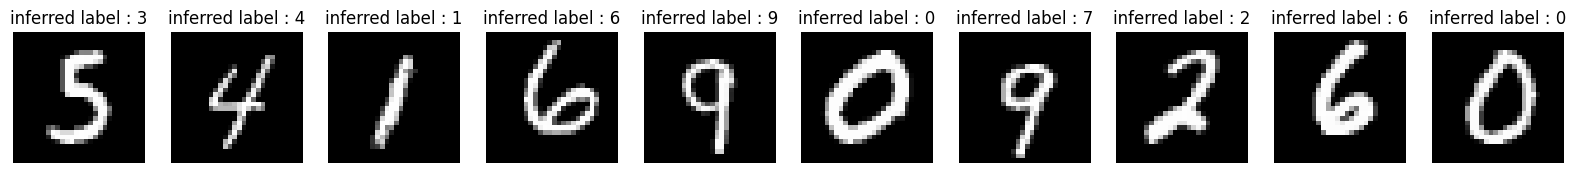

In [ ]:
##**** Tool 2 : Infer a label to each resulting cluster based on the most represented label in the cluster ***##

def infer_cluster_labels(kmedoids, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmedoids.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmedoids.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

cluster_labels = infer_cluster_labels(model, Y_int)
ig, axs = plt.subplots(1, n_clusters, figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
plt.show()

In [ ]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3))

Entropies= [7.04490512 7.158514   7.68799717 5.84354442 7.15148546 6.29710932
 7.19067603 6.64118217 6.41181827 6.25382881]
Average Entropy = 6.768


Cluster  3  presents the lowest entropy value = 5.84354441703136


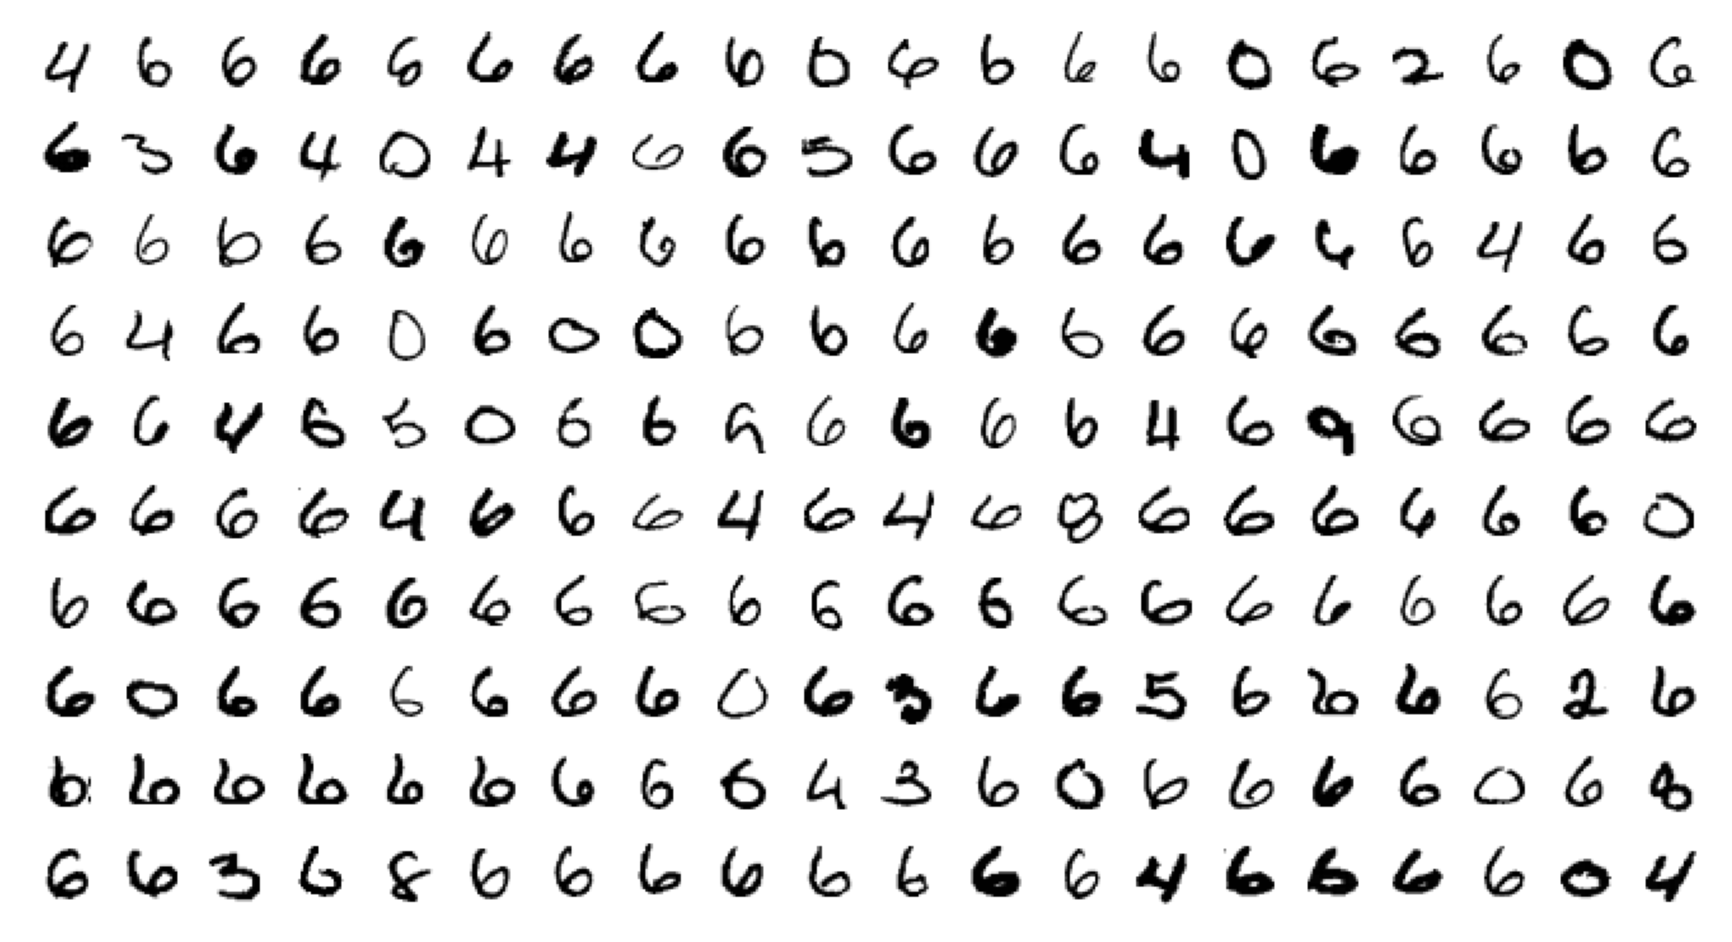

In [ ]:
indmin = np.argmin(entropie)

print("Cluster ", indmin, " presents the lowest entropy value =", entropie[indmin])
imc = X_digits[clusters == indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
    plt.axis('off')

Cluster  2  presents the highest entropy value = 7.687997166393016


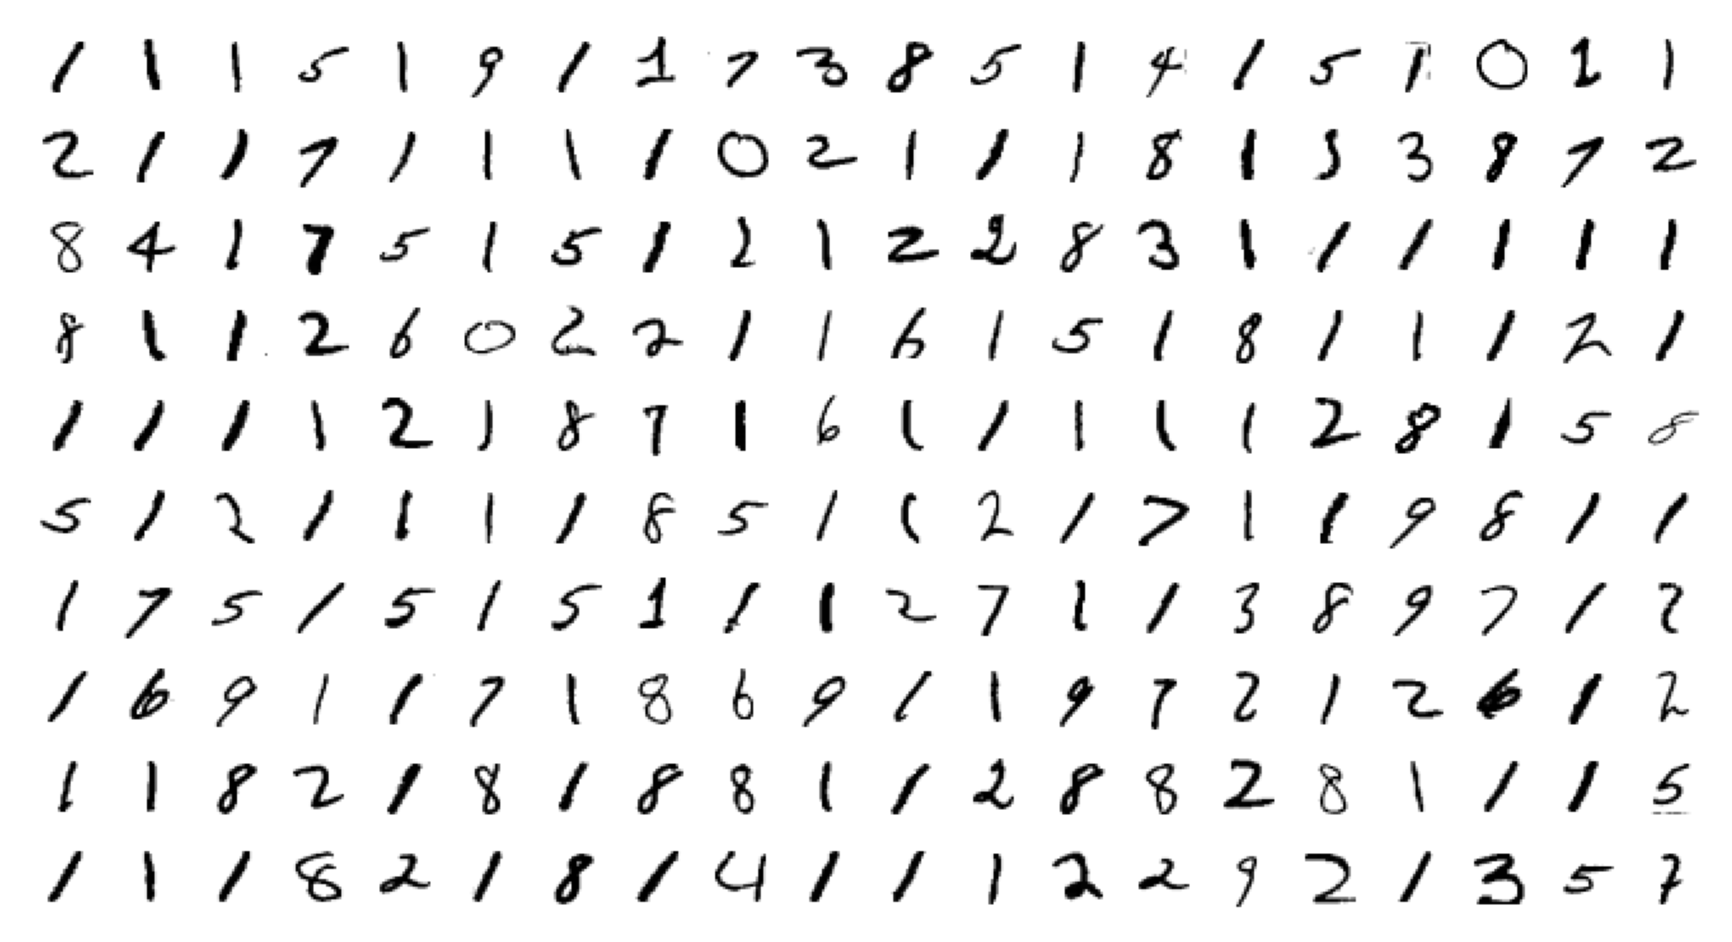

In [ ]:
indmax = np.argmax(entropie)

print("Cluster ", indmax, " presents the highest entropy value =", entropie[indmax])
imc = X_digits[clusters == indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
    plt.axis('off')

In [ ]:
# Test different number of clusters
clu = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n_clust in clu:
    estimator = KMedoids(n_clusters=n_clust, init="k-medoids++")
    estimator.fit(X_digits)

    # Determine the inferred label of each cluster
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)

    # Compute and display the percentage of total good classification
    acc = metrics.accuracy_score(Y_int, predicted_Y)
    acc = acc * 100
    print("For k =", n_clust, ", Good distribution of : {}%\n".format(round(acc, 2)))

For k = 2 , Good distribution of : 15.44%

For k = 3 , Good distribution of : 25.47%

For k = 4 , Good distribution of : 23.27%

For k = 5 , Good distribution of : 35.62%

For k = 6 , Good distribution of : 32.77%

For k = 7 , Good distribution of : 38.42%

For k = 8 , Good distribution of : 43.83%

For k = 9 , Good distribution of : 50.21%

For k = 10 , Good distribution of : 46.49%

For k = 11 , Good distribution of : 48.07%

For k = 12 , Good distribution of : 55.23%

For k = 13 , Good distribution of : 51.33%

For k = 14 , Good distribution of : 56.81%

For k = 15 , Good distribution of : 60.41%



# Gaussian Mixture Model for Clustering


## GMM on Synthetic Dataset

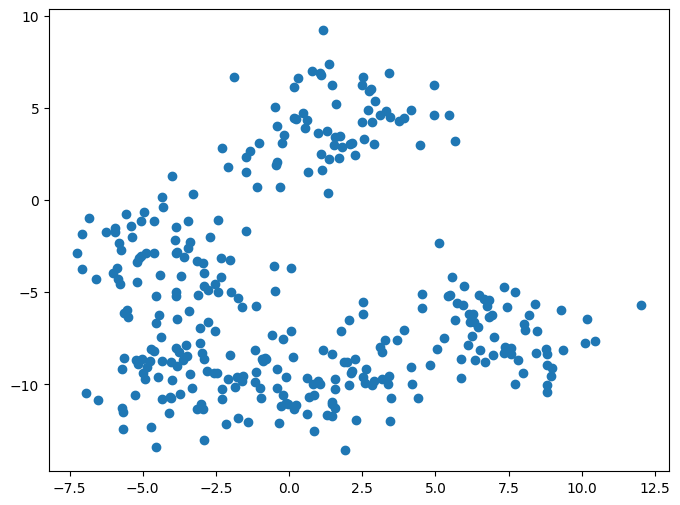

In [ ]:
from sklearn.mixture import GaussianMixture
x, _ = datasets.make_blobs(n_samples=330, centers=5, cluster_std=1.84)

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1])
plt.show()

In [ ]:
gm = GaussianMixture(n_components=5).fit(x)
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 5,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [ ]:
centers = gm.means_
print(centers)

[[ 1.42009659  4.07994485]
 [-3.63808014 -9.47764575]
 [ 7.14525862 -7.05855556]
 [-4.06002084 -3.33328185]
 [ 1.36171058 -9.77430971]]


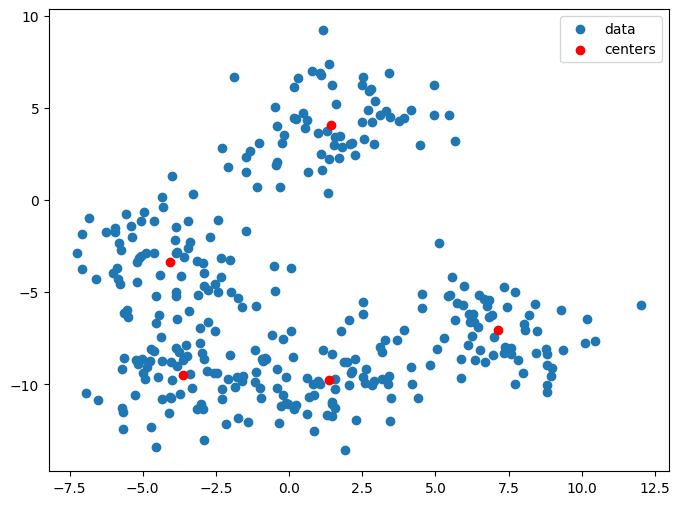

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show()

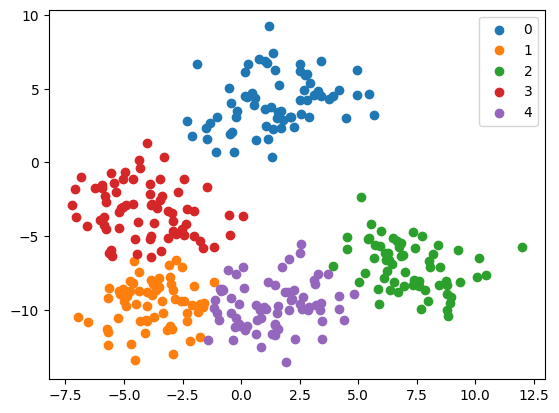

In [ ]:
from pandas import DataFrame
pred = gm.predict(x)

df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()

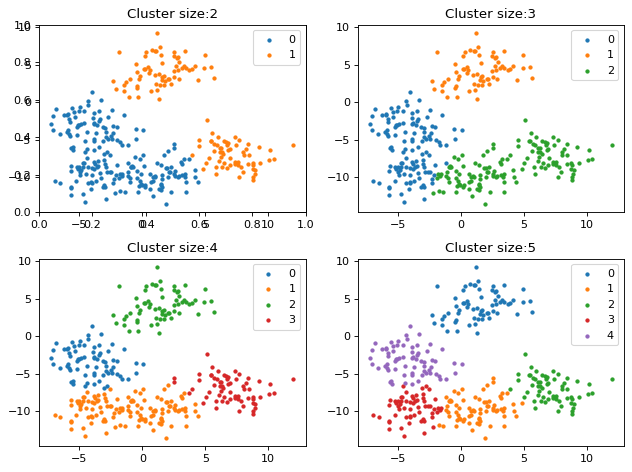

In [ ]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
 gm = GaussianMixture(n_components=i).fit(x)
 pred = gm.predict(x)
 df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
 groups = df.groupby('label')
 f.add_subplot(2, 2, i-1)
 for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()
plt.show()

## GMM on MNIST Dataset

In [ ]:
X_digits = np.array(X_digits)

gm = GaussianMixture(n_components=10).fit(X_digits)

print("******** GMM completed ********")

gm.get_params()

******** GMM completed ********


{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 10,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [ ]:
clusters = gm.predict(X_digits)

In [ ]:
cluster_to_digit = {}
for cluster in range(10):
    # mode_digit = Y_int[clusters == cluster].mean()
    # cluster_to_digit[cluster] = int(round(mode_digit))

    cluster_members = Y_int[clusters == cluster]
    mode_digit = np.bincount(cluster_members).argmax()
    cluster_to_digit[cluster] = mode_digit

print(cluster_to_digit)

{0: 9, 1: 2, 2: 0, 3: 8, 4: 1, 5: 3, 6: 4, 7: 6, 8: 7, 9: 2}


In [ ]:
conf_matrix=sklearn.metrics.confusion_matrix(Y_int,clusters)
print(conf_matrix)

[[  0   6 125   0   0  13   1  17  97 742]
 [  4   0 942 144   6  15   1  11   4   0]
 [630  18  86  97   4  80   1  37  30   8]
 [ 12   6 319   4  14 356   9   5 303   4]
 [  3 192 393  13 198  14 145  16   6   0]
 [  0  17 492  39  20 142  11  20 111  11]
 [  6  89  31  11   0   4   0 848  12  13]
 [  3  65 164   9 453   2 370   0   2   2]
 [  7  16 733  13  14 104  13  15  24   5]
 [  0 113 393   2 353   5 103   2   1   6]]


In [ ]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(10)
for i in range(10):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3))

Entropies= [6.49978704 6.25766759 8.21012441 5.80513497 6.9679092  6.5998705
 6.48310735 6.87832647 6.38012254 6.67329797]
Average Entropy = 6.676


In [ ]:
##**** Tool 3 : Use Entropy metric [1] ***##
import scipy
entropies = np.zeros(10)
for i in range(10):
    cluster_entropie = np.zeros(10)
    for j in range(10):
        cluster_entropie[j] = np.count_nonzero(Y_int[clusters==0] == j)
    cluster_entropie /= Y_int[clusters==0].size
    entropies[i] = scipy.stats.entropy(cluster_entropie)

print("Entropies=", entropies)
print("Average Entropy =", round(entropies.mean(),3))

In [ ]:
##**** Tool 3 : Use Entropy metric [2] ***##
import math

## Compute clusters entropy ##

# Iterate over clusters
cluster_entropies = np.zeros(10)
for i in range(10):

    # Compute probability of each digit in cluster
    prob = np.zeros(10)
    for j in range(10):
        prob[j] = np.count_nonzero(Y_int[clusters==i] == j)
    prob /= Y_int[clusters==i].size

    # Compute cluster entropy
    for j in range(10):
        if prob[j] != 0:
            cluster_entropies[i] -= prob[j] * math.log2(prob[j])

## Compute total entropy ##

# Iterate over clusters
total_entropie = 0
for i in range(10):
    total_entropie += cluster_entropies[i] * Y_int[clusters==i].size / Y_int.size

print("Entropies =", cluster_entropies)
print("Total entropie =", total_entropie)
print("Average Entropy =", round(cluster_entropies.mean(),3))

In [ ]:
##**** Tool 3 : Use Entropy metric [3] ***##
total_points = len(clusters)
cluster_entropies = []

for cluster in range(10):
    # Count the occurrences of each label in the cluster
    cluster_count = np.sum(clusters == cluster)

    # Compute the probability of each label occurrence
    cluster_probability = cluster_count / total_points

    # Calculate entropy for the cluster
    cluster_entropy = scipy.stats.entropy([cluster_probability, 1 - cluster_probability], base=2)

    # Append entropy to the list
    cluster_entropies.append(cluster_entropy)

# Print or use the cluster entropies as needed
for i, entropy_value in enumerate(cluster_entropies):
    print(f"Entropy of Cluster {i}: {entropy_value}")
print("Average Entropy =", round(np.array(cluster_entropies).mean(),3))

Cluster  3  presents the lowest entropy value = 5.805134968916488


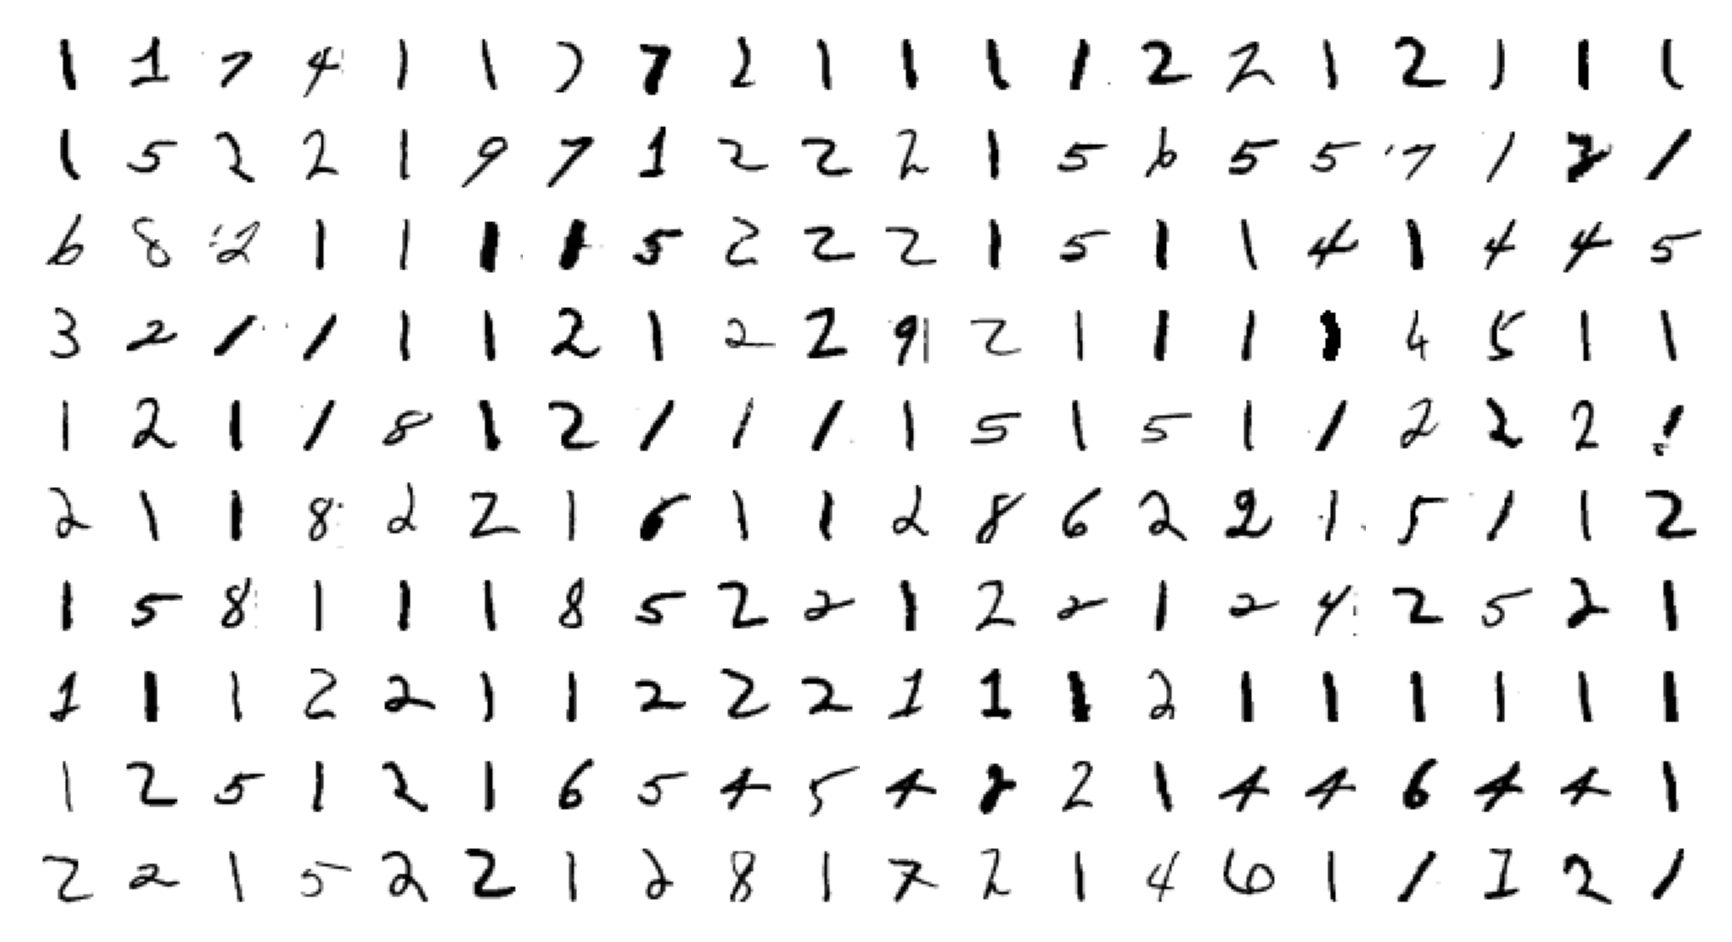

In [ ]:
indmin = np.argmin(entropie)

print("Cluster ", indmin, " presents the lowest entropy value =", entropie[indmin])
imc = X_digits[clusters == indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
    plt.axis('off')

In [ ]:
indmax = np.argmax(entropie)

print("Cluster ", indmax, " presents the highest entropy value =", entropie[indmax])
imc = X_digits[clusters == indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
    plt.axis('off')

In [ ]:
# Test different number of clusters
clu = [9, 10, 11]

for n_clust in clu:
    estimator = GaussianMixture(n_components=n_clust)
    estimator.fit(X_digits)

    # Determine the inferred label of each cluster
    predicted_Y = estimator.predict(X_digits)

    # Compute and display the percentage of total good classification
    acc = metrics.accuracy_score(Y_int, predicted_Y)
    acc = acc * 100
    print("For k =", n_clust, ", Good distribution of : {}%\n".format(round(acc, 2)))

For k = 9 , Good distribution of : 4.6%



KeyboardInterrupt: 

# Limitation of K-Means

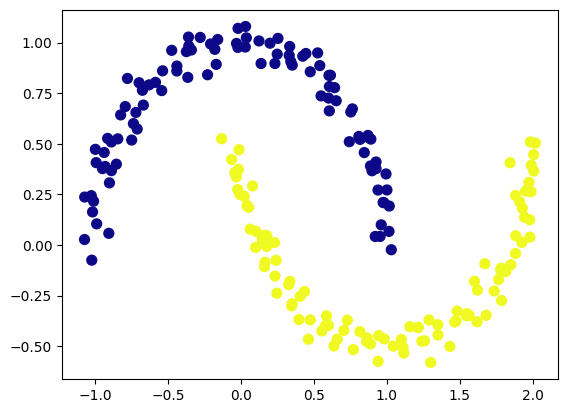

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap="plasma")

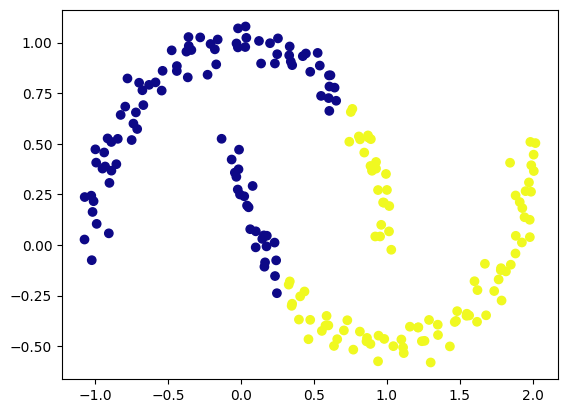

In [ ]:
##**** Apply K-means clustering with k=2 ***##
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=0)
Y_hat_kmeans = kmeans.fit(X).labels_
plt.scatter(X[:,0], X[:,1], c=Y_hat_kmeans, cmap="plasma")

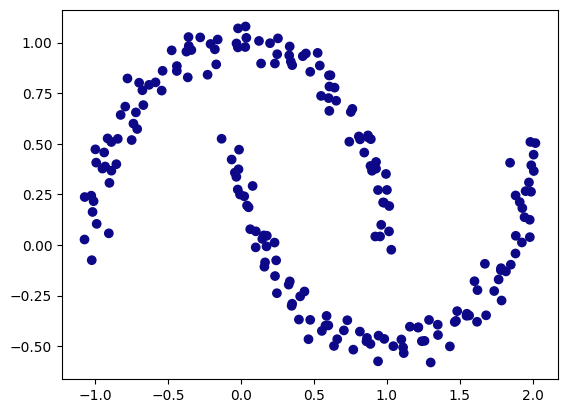

In [ ]:
##**** Apply DBSCAN clustering ***##
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
Y_hat_dbscan = dbscan.fit(X).labels_
plt.scatter(X[:,0], X[:,1], c=Y_hat_dbscan, cmap="plasma")

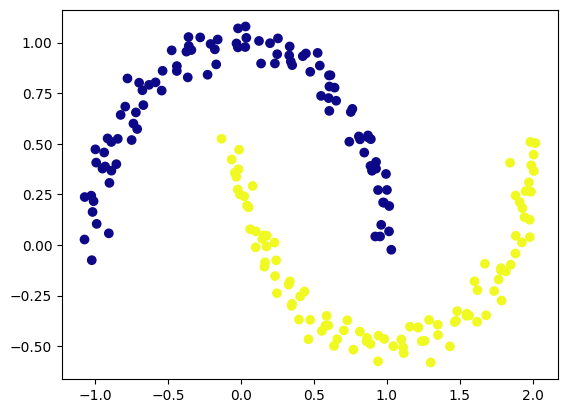

In [ ]:
##**** Apply DBSCAN clustering ***##
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.25)
Y_hat_dbscan = dbscan.fit(X).labels_
plt.scatter(X[:,0], X[:,1], c=Y_hat_dbscan, cmap="plasma")

# K-Means for Compression / Segmentation

In [ ]:
from skimage import io

Shape of the Image :  (330, 330, 3)


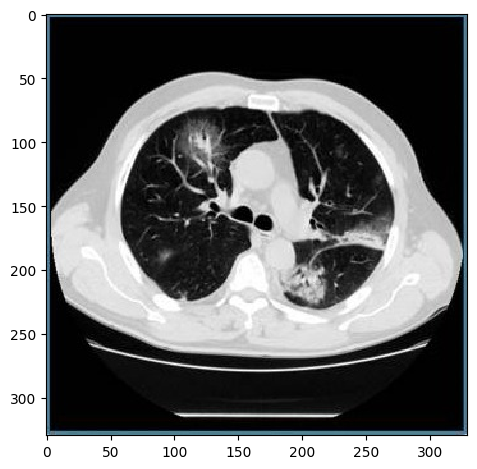

In [ ]:
##**** Read the image 1 ***##
OrigImage = io.imread('Lung.jpg')
io.imshow(OrigImage)
print('Shape of the Image : ', OrigImage.shape)


In [ ]:
##**** Reshape the image : convert the image into a vector BUT here each element of the vector is in 3D (RGB) ***##
rows, cols = OrigImage.shape[0], OrigImage.shape[1]
image = OrigImage.reshape(rows * cols, 3)
print(image.shape)
print(image[:4])

(108900, 3)
[[189 223 233]
 [124 161 170]
 [104 140 154]
 [ 90 130 142]]


In [ ]:
##**** Apply K-Means on the image with K=5, K=10 and K=16 ***##
kMeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
model=kMeans.fit(image)

##**** Observe examples of Centeroids in RGB domain (3D) ***##
centers = np.asarray(model.cluster_centers_, dtype = np.uint8)
#centers

In [ ]:
# labels
labels = np.asarray(model.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
#labels

(108900,)
(330, 330)


(330, 330, 3)

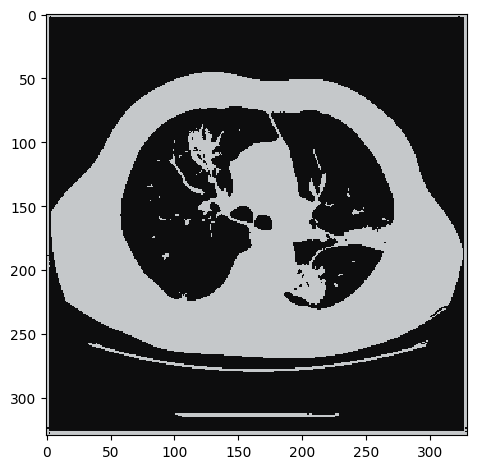

In [ ]:
##**** Reconstruction of the image based on the segmentation obtained with K-means ***##
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # Assignment of every pixel the rgb color of their label's center
            newImage[i, j, :] = centers[labels[i, j], :]
#io.imsave('dog-compressed.png', newImage);
io.imshow(newImage)
newImage.shape

Text(0.5, 1.0, 'Compressed Image')

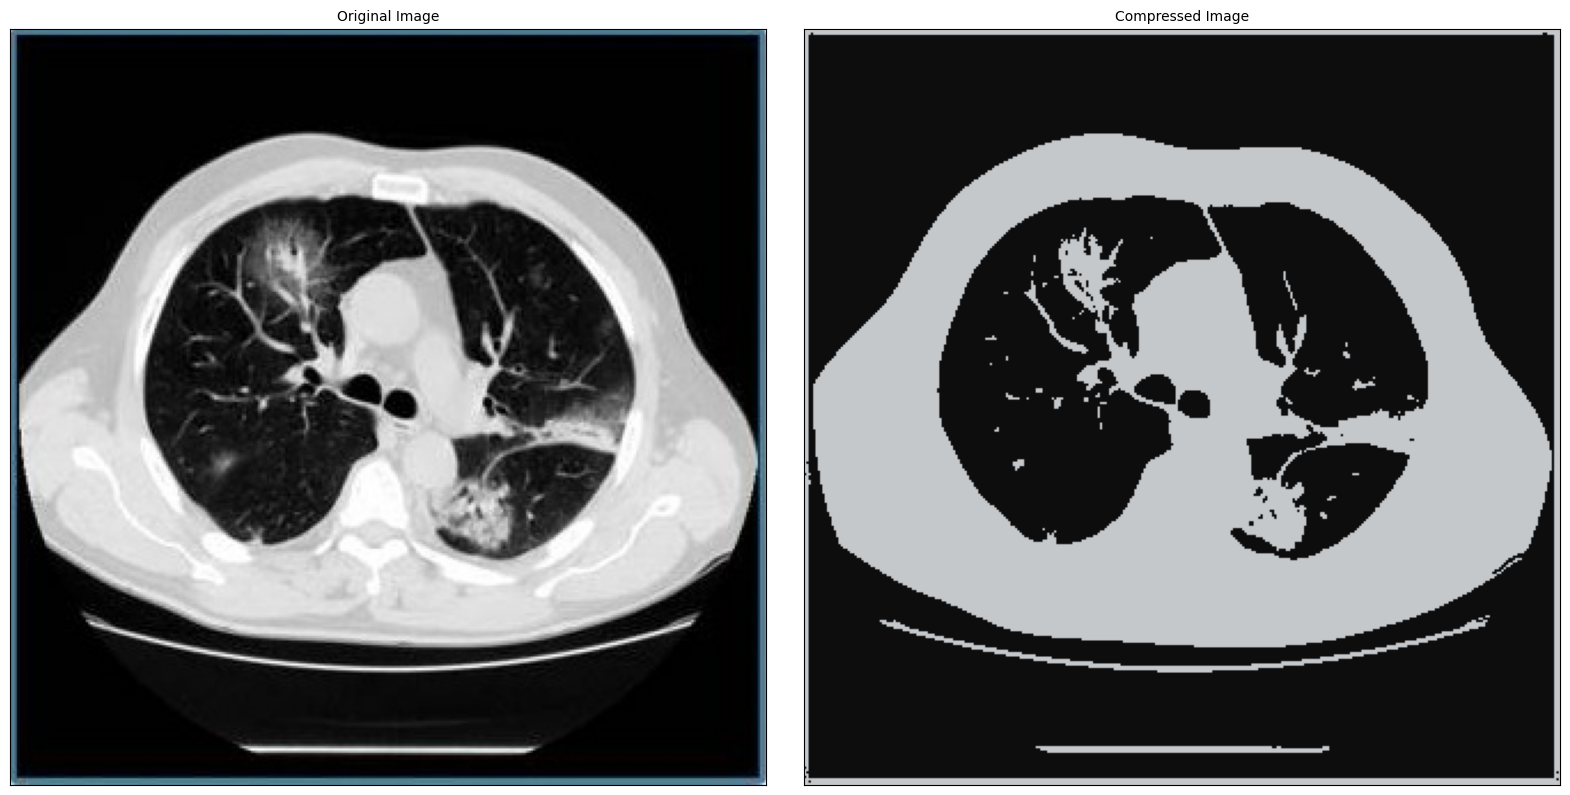

In [ ]:
##**** Display the original and the compressed images side-by-side for a better comparion ***##
##**** Compare with different values of k clusters ***##

fig, ax = plt.subplots(1, 2, figsize=(20, 10),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(OrigImage)
ax[0].set_title('Original Image', size=10)
ax[1].imshow(newImage)
ax[1].set_title('Compressed Image', size=10)